\# Welcome to CS 5242 **Homework 1**

ASSIGNMENT DEADLINE ⏰ : **23:59 09 Feb 2024**

In this assignment, the task is to implement Multi-Layer Perceptron (MLP) for predicting the price of houses in Boston from scratch.

Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs. In this semester, we will use Colab to run our experiments.


### **Grades Policy**

We have 10 points for this homework. 15% off per day late, 0 scores if you submit it 7 days after the deadline.

### **Cautions**

**DO NOT** use external libraries like PyTorch or TensorFlow in your implementation.

**DO NOT** copy the code from the internet, e.g. GitHub.

Rename the assignment file as "StuID_Name_assignment-1.ipynb". e.g., 'A0100000J_Wang-Wenjie_assignment-1.ipynb'. And submit it to Canvas.


---

### **Contact**

Please feel free to contact us if you have any question about this homework or need any further information.

Slack: Ziming Liu

TA Email: liuziming@comp.nus.edu.sg


## Setup

Start by running the cell below to set up all required software.

In [ ]:
!pip install numpy matplotlib scikit-learn

Import the neccesary library.

In [ ]:
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


Everything is ready, you can move on and ***Good Luck !*** 😃

## Explore Boston Housing Dataset

One of the first steps when working with a new data set is exploring.The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

First, we download the dataset from the Internet.

In [ ]:
!mkdir -p data \
    && cd data \
    && wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data \
    && ls -l .

total 48
-rw-r--r-- 1 root root 49082 Jan 30 13:57 housing.data


The next thing to do is to reformat the data. Now we reshape the data into a (num_sample, num_features) array.

In [ ]:
datafile = 'data/housing.data'
data = np.fromfile(datafile, sep=' ')
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(data.shape)
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])
print(data.shape)
print(data)

(7084,)
(506, 14)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


One important step of data processing is to rescale the features. In this case, we use minmax scaling. After rescaling, the range of the data will become 0-1.

In [ ]:
# rescale data using minmax scaling.
def scale_data(X):
    X_scaled = None
    #########Enter your code here######### (One point)
    feature_range = [0,1]  # 要映射的区间
    # print(X.min(axis=0))
    # print(X.max(axis=0))
    X_std = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
    X_scaled = X_std*(feature_range[1]-feature_range[0]) + feature_range[0]
    # print(X_scaled)

    #########Code end#########
    return X_scaled

In [ ]:
ratio = 0.8
offset = int(data.shape[0] * ratio)

In [ ]:
x = data[:, :-1]
y = data[:, -1:]
x = scale_data(x)
X_train = x[:offset]
X_test = x[offset:]
Y_train = y[:offset]
Y_test = y[offset:]

An easy to quickly get an idea for how your data looks is to examine the shape of the matrix it's stored using the `.shape` attribute of numpy arrays. We see that the shape of `X_train` is `404 x 13`, which tells us there are `404` samples (images) each with dimension `13`.

In [ ]:
print(f"The shape of the training set is: {X_train.shape[0]} x {X_train.shape[1]}")
print(f"The shape of the test set is: {X_test.shape[0]} x {X_test.shape[1]}")

The shape of the training set is: 404 x 13
The shape of the test set is: 102 x 13


Now lets take a look at how the samples are represented, we can do this by calling `Y_train[index]` and `X_train[index]` (here I choose `index=0` to look at the very first sample). We first notice `Y_train[0]=24`, meaning this entry is a house worthy of 24. The data type of the numpy array is float64 by default.

In [ ]:
index = 0
print(f"Y_train[{index}]: {Y_train[index]}")
print(X_train[index])
print(X_train[index].dtype)

Y_train[0]: [24.]
[0.         0.18       0.06781525 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.20801527 0.28723404 1.
 0.08967991]
float64


We can also check how related the features are with the house price.

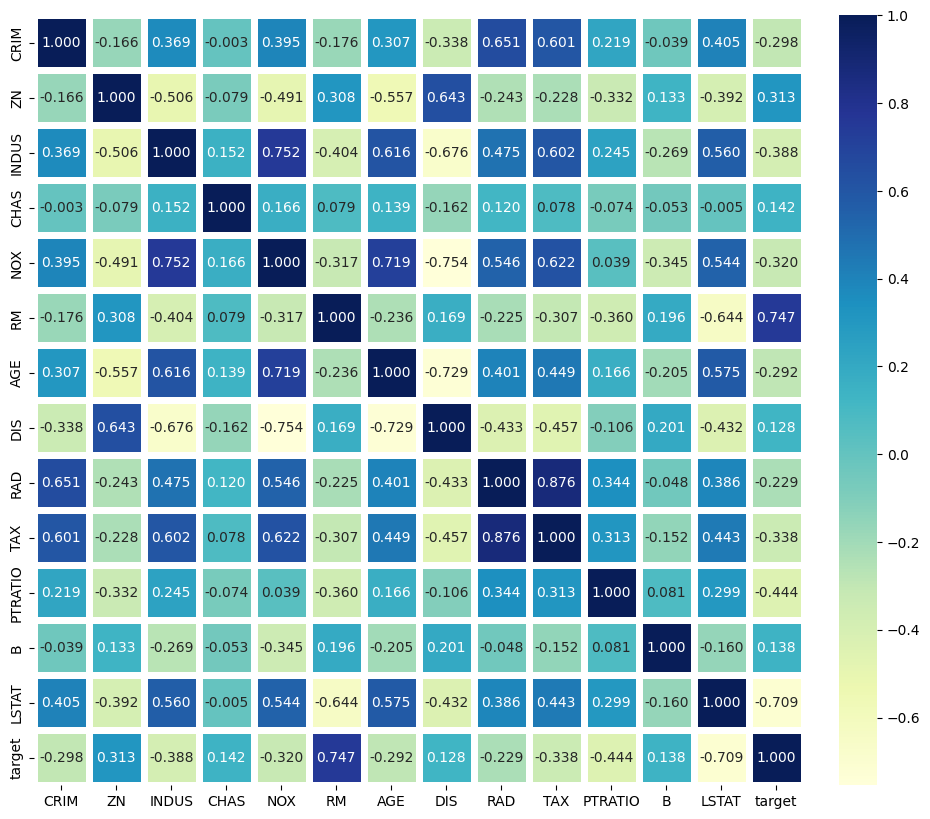

In [ ]:
housedatadf=pd.DataFrame(data=X_train,columns=feature_names[:-1])
housedatadf["target"]=Y_train
datacor=np.corrcoef(housedatadf.values,rowvar=0)
datacor=pd.DataFrame(data=datacor,columns=housedatadf.columns,index=housedatadf.columns)
plt.figure(figsize=(15,10))
ax=sns.heatmap(datacor,square=True,annot=True,fmt=".3f",linewidths=5,cmap="YlGnBu",cbar_kws={"fraction":0.046,"pad":0.03})
plt.show()

## Implementation of Multilayer perceptron

We'll first go through and write the code for each piece of an MLP in generic Python functions. We'll then wrap everything in an `MLP` class, which will allow us to easily access all the MLP functionality in a user friendly manner.

### Training

You have **three tasks** in this section.
1. You need to implement `__init__` function
1. You need to implement `mse_loss` function
2. You need to implement `forward` function.
3. You need to implement `backward` function.
4. You need to implement the main loop of `train` function.

In [ ]:
class MLP(object):
    def __init__(self, num_of_weights, learning_rate=0.01):
        np.random.seed(42)
        self.learning_rate = learning_rate
        # As this is a very simple problem, we only need one linear layer here.
        # Init a linear layer with weight(using standard normal distribution) and bias(to 0).
        #########Enter your code here#########  (One point)
        self.w = np.random.rand(num_of_weights, 1)
        self.b = 0


        #########Code end#########

    def mse_loss(self, y_pred, y):

        #########Enter your code here#########  (One point)
        loss_ = np.mean(np.power(y - y_pred, 2))

        #########Code end#########
        return loss_

    def forward(self, x):

        #########Enter your code here#########  (Two points)
        out_ = np.dot(x, self.w) + self.b


        #########Code end#########
        return out_

    def backward(self, x, y_pred, y):

        # Calculate the gradient and update the weight and bias using the gradient.
        #########Enter your code here######### (Two points)
        y_pred = self.forward(x)
        gradient_w = (y_pred - y) * x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (y_pred - y)
        gradient_b = np.mean(gradient_b)
        self.w = self.w - self.learning_rate * gradient_w
        self.b = self.b - self.learning_rate * gradient_b

        #########Code end#########


    def train(self, X, Y, num_epoches, batch_size):
        n_samples = len(X)
        losses = []
        for epoch_id in range(num_epoches):
            shuffle = np.random.permutation(n_samples)
            X_batches = np.array_split(X[shuffle], n_samples / batch_size)
            Y_batches = np.array_split(Y[shuffle], n_samples / batch_size)
            iter_id = 0
            for batch_x, batch_y in zip(X_batches, Y_batches):
                #########Enter your code here######### (One point)
                y_pred = self.forward(batch_x)
                loss = self.mse_loss(y_pred, batch_y)
                self.backward(batch_x, y_pred, batch_y)
                losses.append(loss)

                #########Code end#########
                print('Epoch {:3d} / iter {:3d}, loss={:4f}'.format(epoch_id + 1, iter_id, loss))
                iter_id += 1
        return losses

Great, now let's give this a try. Let's create a really simple MLP. We'll train with a `batch_size=100` for `epochs=50` and a learning rate `lr=0.1`.

Epoch   1 / iter   0, loss=545.235687
Epoch   1 / iter   1, loss=300.669289
Epoch   1 / iter   2, loss=199.629446
Epoch   1 / iter   3, loss=150.456924
Epoch   2 / iter   0, loss=83.248048
Epoch   2 / iter   1, loss=122.996574
Epoch   2 / iter   2, loss=108.815773
Epoch   2 / iter   3, loss=119.508330
Epoch   3 / iter   0, loss=110.578702
Epoch   3 / iter   1, loss=102.735251
Epoch   3 / iter   2, loss=86.978209
Epoch   3 / iter   3, loss=84.221373
Epoch   4 / iter   0, loss=79.616594
Epoch   4 / iter   1, loss=115.215345
Epoch   4 / iter   2, loss=69.770446
Epoch   4 / iter   3, loss=95.097262
Epoch   5 / iter   0, loss=98.003244
Epoch   5 / iter   1, loss=78.516956
Epoch   5 / iter   2, loss=57.736167
Epoch   5 / iter   3, loss=100.632517
Epoch   6 / iter   0, loss=85.292243
Epoch   6 / iter   1, loss=72.474382
Epoch   6 / iter   2, loss=107.165902
Epoch   6 / iter   3, loss=52.453744
Epoch   7 / iter   0, loss=58.608234
Epoch   7 / iter   1, loss=87.025537
Epoch   7 / iter   2, loss

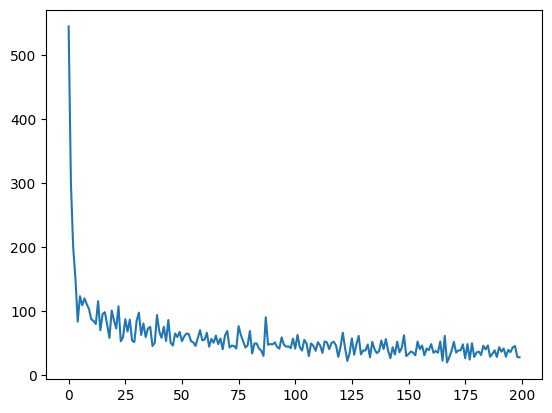

In [ ]:
network = MLP(13, 0.1)
losses = network.train(X_train, Y_train, num_epoches=50, batch_size=100)
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

Now we can check the performance on the test set!

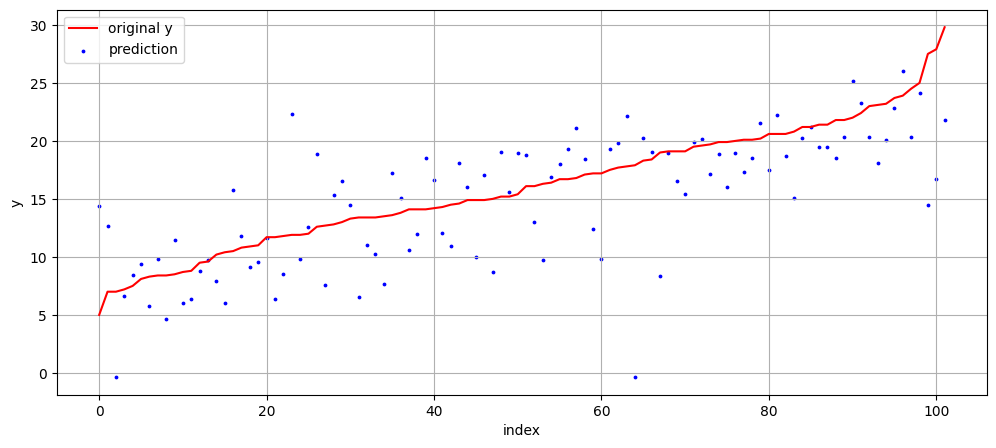

In [ ]:
Y_pred=network.forward(X_test)
# mse=mean_absolute_error(y_test,pre_y)
Y_pred = np.squeeze(Y_pred)
Y_test = np.squeeze(Y_test)
index=np.argsort(Y_test)
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(Y_test)),Y_test[index],"r",label="original y")
plt.scatter(np.arange(len(Y_test)),Y_pred[index],s=3,c="b",label="prediction")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("index")
plt.ylabel("y")
plt.show()

## Discussion (2 points)

In this section, you are free to choose some of the following directions to explore, and try to summarize some patterns and conclusions.

* Try to use different learning rates and generalize the impact of learning rate on training.
* Try to use different ways of weight initialization and explore the impact on the convergence and final classification performance.
* Try to use a portion of the data for training (e.g., 10%, 20%, 50%) to explore the training convergence and final classification performance with different amounts of data.

> **NOTE:** *Good Disscusion* include experimental setup, presentation of experimental results including visualization, analysis and interpretation of phenomena, and summary of conclusions

Epoch   1 / iter   0, loss=545.235687
Epoch   1 / iter   1, loss=383.437878
Epoch   1 / iter   2, loss=274.656449
Epoch   1 / iter   3, loss=171.724398
Epoch   2 / iter   0, loss=77.828545
Epoch   2 / iter   1, loss=92.765036
Epoch   2 / iter   2, loss=72.233029
Epoch   2 / iter   3, loss=75.969379
Epoch   3 / iter   0, loss=76.187458
Epoch   3 / iter   1, loss=61.782535
Epoch   3 / iter   2, loss=57.586577
Epoch   3 / iter   3, loss=48.516670
Epoch   4 / iter   0, loss=44.780609
Epoch   4 / iter   1, loss=83.453850
Epoch   4 / iter   2, loss=67.731384
Epoch   4 / iter   3, loss=96.280357
Epoch   5 / iter   0, loss=93.944737
Epoch   5 / iter   1, loss=77.422364
Epoch   5 / iter   2, loss=46.766848
Epoch   5 / iter   3, loss=66.875649
Epoch   6 / iter   0, loss=62.206734
Epoch   6 / iter   1, loss=52.770543
Epoch   6 / iter   2, loss=63.090014
Epoch   6 / iter   3, loss=24.836733
Epoch   7 / iter   0, loss=35.980830
Epoch   7 / iter   1, loss=54.647734
Epoch   7 / iter   2, loss=39.4846

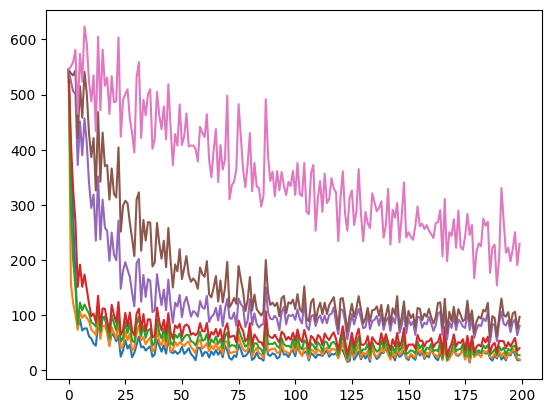

In [ ]:
# === Complete the code (2')
learning_rates = [0.5, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001]
for learning_rate in learning_rates:
    network = MLP(13, learning_rate)
    losses = network.train(X_train, Y_train, num_epoches=50, batch_size=100)
    plot_x = np.arange(len(losses))
    plot_y = np.array(losses)
    plt.plot(plot_x, plot_y)
plt.show()
# === Complete the code

Write down your analysis and conclusions:

The learning rate is a crucial hyperparameter in training machine learning models, including neural networks. It determines the size of the steps taken during optimization to find the minimum of the loss function. Choosing an appropriate learning rate is essential for achieving good model performance.

It can be seen from the figure that as the learning rate grow, the loss drop more quickl. This means that the model converge more rapidly as the learning rate grow. However, when the learning rate is too large, it may cause the loss value oscillate or even diverge. Here's a generalization of the impact of learning rate on training:

1. High Learning Rate:
   - Effect: With a high learning rate, the model might converge quickly, but there's a risk of overshooting the optimal weights. The optimization algorithm may oscillate around the minimum or even diverge.
   - Impact: Training might be fast initially, but the model may fail to converge or converge to a suboptimal solution.

2. Low Learning Rate:
   - Effect: A low learning rate results in small steps during optimization. This may lead to slow convergence and require a large number of epochs for training to reach a minimum.
   - Impact: Although it may lead to a more accurate model, it could take a long time to train, and there's a risk of getting stuck in local minima.

3. Appropriate Learning Rate:
   - Effect: An appropriate learning rate allows the model to converge efficiently without overshooting or taking excessively small steps.
   - Impact: Training is stable, and the model reaches a good solution in a reasonable amount of time. It balances speed and accuracy.

In summary, choosing the right learning rate is a crucial aspect of training neural networks. It requires experimentation and understanding the characteristics of the specific problem and dataset. Techniques such as adaptive learning rates and learning rate scheduling can enhance the training process and contribute to better model performance.

